In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import skvideo.io
from tqdm import tqdm
import cv2 as cv
%matplotlib inline
from scipy.optimize import rosen
from keras.activations import elu, softmax

Using TensorFlow backend.


In [ ]:
cap = cv.VideoCapture(cv.samples.findFile("../train/videos/trash/trainGray_Clipped.m4v"))
while(cap.isOpened()):
    ret, frame1 = cap.read()
    pic = cv.cvtColor(frame1,cv.COLOR_BGR2HSV)
    pic2 = np.copy(pic)
    pic3 = np.copy(pic)
    pic4 = np.copy(pic)
    pic5 = np.copy(pic)
    pic6 = np.copy(pic)
#     pic2[...,2] = pic2[...,2] * .2
    pic3[...,2] = pic3[...,2] * .7
    pic4[...,2] = pic4[...,2] * 1.2
    pic5[...,2] = pic5[...,2] * 1.4
#     pic6[...,2] = pic6[...,2] * 1.8

    pic = cv.cvtColor(pic,cv.COLOR_HSV2RGB)
#     pic2 = cv.cvtColor(pic2,cv.COLOR_HSV2RGB)
    pic3 = cv.cvtColor(pic3,cv.COLOR_HSV2RGB)
    pic4 = cv.cvtColor(pic4,cv.COLOR_HSV2RGB)
    pic5 = cv.cvtColor(pic5,cv.COLOR_HSV2RGB)
#     pic6 = cv.cvtColor(pic6,cv.COLOR_HSV2RGB)

    cv.imshow('frame1',pic)
#     cv.imshow('frame2',pic2)
    cv.imshow('frame3',pic3)
    cv.imshow('frame4',pic4)
    cv.imshow('frame5',pic5)
#     cv.imshow('frame6',pic6)
    if cv.waitKey(0) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('./train/trainGray.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #cv2.imshow('frame', gray)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv.destroyAllWindows()

In [ ]:
X = 0.1 * np.arange(10)
print(X)
print(rosen(X))
a = np.sum(100.0*(X[1:] - X[:-1]**2.0)**2.0 + (1 - X[:-1])**2.0)
print(a)
print(100.0*(X[1:] - X[:-1]**2.0)**2.0)

In [ ]:
b = np.empty((0,2))
for i in range(10):
    print(i)
    rando = np.array([i, i+1])
    print(rando.shape)
    print(b.shape)
    b = np.append(b, [rando], axis=0)
print(b)
print(b[0])

In [ ]:
b = None

In [ ]:
c = np.arange(10, dtype='uint8')
print(c)
c = c - 5
print(c)
c.dtype='bool'
print(c)
print(c.shape, c.dtype)

In [ ]:
d = 3*180/np.pi/2
e = 3*(180/np.pi/2)
print(d)
print(e)

In [ ]:
f = np.array([1,11,32,6,21,46,37,17])
print(np.mean(f))
l = ((np.sum(f[0:4])/4) + (np.sum(f[4:])/4))/2
print(l)

In [ ]:
f = np.array([9,9,9,9,9,9])
print(np.mean(np.square(f)))

In [ ]:
f = np.array([1,11,32,6,21,46,37,17])
g = np.array([[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2],[1,2]])
print(g.shape, np.transpose(g).shape)
np.multiply(f,np.transpose(g))

In [ ]:
for i in range(0,20,2):
    print(i)

In [ ]:
elu((.1, 1, -1, -.1), alpha=1.0)

In [ ]:
train_csv_path = '../train/text/CSV'
train_meta = pd.read_csv(os.path.join(train_csv_path, 'trainGrayClipped_meta.csv'))

In [ ]:
train_meta.head()

In [ ]:
train_meta.shape

In [ ]:
train_meta = train_meta.assign(predicted_speed=pd.Series(np.empty((20400))).values)

In [ ]:
train_meta.loc[:]['predicted_speed'] = np.nan

In [ ]:
train_meta.loc[:10,'predicted_speed'] = 2

In [ ]:
train_meta.head()

In [ ]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
y2 = np.sin(x)
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

fig, ax = plt.subplots()
ax.plot(x, y2)
ax.set_title('Simple plot 2')


# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)
fig, ax = plt.subplots(num=10, clear=True)

In [ ]:
train_csv_path = '../train/text/CSV'
train_meta = pd.read_csv(os.path.join(train_csv_path, 'trainGrayClipped_meta.csv'))

data_index = np.loadtxt('../train/text/train_val_index.txt', np.dtype('int16'), delimiter='\n')
dataset_frames_num = train_meta.shape[0]
train_frames_num = int(.8*(dataset_frames_num-1))

train_index = data_index[:train_frames_num]
val_index = data_index[train_frames_num:]

print(len(train_index))
print(len(val_index))
print(len(train_index)+len(val_index))

In [ ]:
data_index = np.loadtxt('../train/text/train_val_index.txt', np.dtype('int16'), delimiter='\n')
print(data_index[22])
print(data_index[22:22+1])

In [ ]:
img_height = 120
img_width = 300
img_channels = 3
opt_flow_arr = np.empty((0, img_height, img_width, img_channels))
an_arr = np.empty((2, img_height, img_width, img_channels))
for i in range(2):
    for j in range(img_height):
        for k in range(img_width):
            for l in range(img_channels):
                an_arr[i,j,k,l] = i+j+k+l
print(opt_flow_arr.shape, an_arr.shape)

In [ ]:
opt_flow_arr = np.append(opt_flow_arr, an_arr, axis=0)
print(opt_flow_arr.shape, an_arr.shape)

In [4]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig_size2 = plt.rcParams["figure.figsize"]
print(fig_size2)

[6.0, 4.0]
[15.0, 10.0]


6335
11036


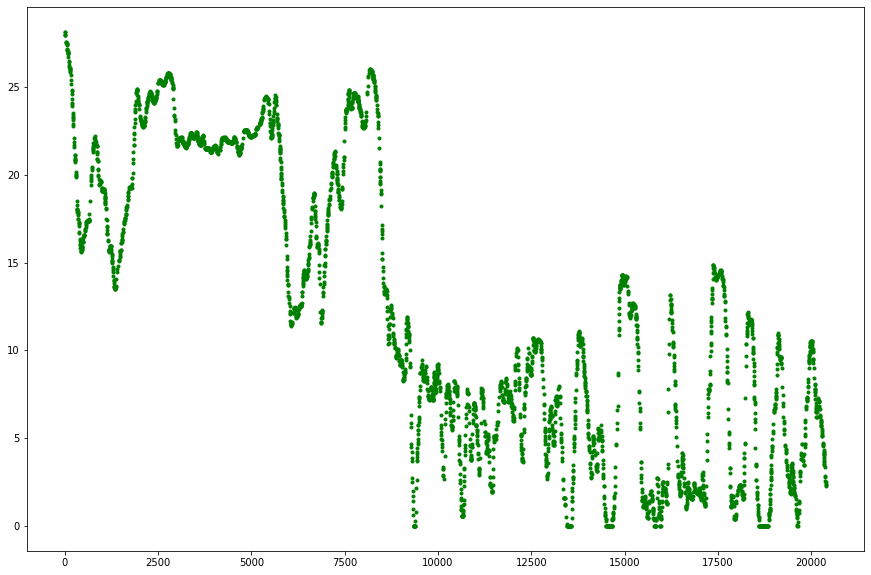

In [37]:
train_meta_loc = '../train/text/CSV'
train_meta_loc = os.path.join(train_meta_loc, 'trainGrayTrimmed_meta.csv')
train_meta = pd.read_csv(train_meta_loc)

data_index = np.loadtxt('../train/text/train_val_index.txt', np.dtype('int16'), delimiter='\n')
np.random.shuffle(data_index)

dataset_frames_num = train_meta.shape[0]
train_frames_num = int(.80*(dataset_frames_num-1))

train_index = data_index[:train_frames_num]
val_index = data_index[train_frames_num:][:2000]
test_index = data_index[train_frames_num:][2000:]
print(data_index[0])
print(val_index[0])
#print(train_index, val_index)
plt.plot(train_meta['speed'][train_index], 'ro', markersize=0)
plt.plot(train_meta['speed'][val_index], 'go', markersize=3)
plt.plot(train_meta['speed'][test_index], 'go', markersize=3)